In [1]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
salary_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

test_dataset['Best Performance'] = pd.Series([0 for x in range(len(test_dataset.index))])


In [3]:
salary_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [6]:
salary_dataset.isnull().sum().sum()


2

In [7]:
salary_dataset.replace(np.nan, 0)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


In [8]:
salary_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [10]:
temp=pd.concat([salary_dataset,test_dataset])
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17153 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              17153 non-null  object 
 1   job_duration_in_current_job_level      17153 non-null  float64
 2   person_level                           17153 non-null  object 
 3   job_duration_in_current_person_level   17153 non-null  float64
 4   job_duration_in_current_branch         17153 non-null  float64
 5   Employee_type                          17153 non-null  object 
 6   gender                                 17153 non-null  int64  
 7   age                                    17153 non-null  int64  
 8   marital_status_maried(Y/N)             17153 non-null  object 
 9   number_of_dependences                  17153 non-null  int64  
 10  Education_level                        17153 non-null  object 
 11  GPA

In [38]:
temp.replace(np.nan, 0)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17153 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              17152 non-null  float64
 1   job_duration_in_current_job_level      17153 non-null  float64
 2   person_level                           17153 non-null  int32  
 3   job_duration_in_current_person_level   17153 non-null  float64
 4   job_duration_in_current_branch         17153 non-null  float64
 5   Employee_type                          17153 non-null  int32  
 6   gender                                 17153 non-null  int64  
 7   age                                    17153 non-null  int64  
 8   marital_status_maried(Y/N)             17153 non-null  int32  
 9   number_of_dependences                  17153 non-null  int64  
 10  Education_level                        17153 non-null  int32  
 11  GPA

In [11]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(temp)
df.columns
df.isin(['?']).sum(axis=0)


job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

In [36]:
df.info

<bound method DataFrame.info of       job_level  job_duration_in_current_job_level  person_level  \
0           1.0                           1.352775             5   
1           1.0                           1.292285             5   
2           0.0                           2.565151             1   
3           0.0                           2.828427             1   
4           0.0                           2.828427             1   
...         ...                                ...           ...   
5995        1.0                           1.292285             5   
5996        1.0                           1.352775             5   
5997        1.0                           1.385641             5   
5998        0.0                           1.385641             7   
5999        1.0                           1.352775             5   

      job_duration_in_current_person_level  job_duration_in_current_branch  \
0                                 1.352775                        1.73205

In [14]:
df.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance'],
      dtype='object')

In [15]:
df.isin(['?']).sum(axis=0)

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

In [16]:
income = set(df['Employee_type'])
print(income)

{'RM_type_C', 'RM_type_A', 'RM_type_B'}


In [17]:
#mapping the data into numerical data using map function
df['Employee_type'] = df['Employee_type'].map({'RM_type_B': 0, 'RM_type_C': 1, 'RM_type_A': 2}).astype(int)


In [18]:
#check the data is replaced 
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,2,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,2,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,1,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,2,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,2,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [19]:
marit = set(df['marital_status_maried(Y/N)'])
print(marit)

{'N', 'Y'}


In [20]:
#Mapping the values to numerical values 
df['marital_status_maried(Y/N)'] = df['marital_status_maried(Y/N)'].map({'Y': 1, 'N': 0}).astype(int)

In [21]:
#check the data is replaced 
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,2,2,1985,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,2,2,1989,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,1,1,1970,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,2,2,1967,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,2,2,1965,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [22]:
Work = set(df['job_level'])
print(Work)


{'JG03', 'JG06', 'JG05', 'JG04'}


In [23]:
#Mapping the values to numerical values 
df['job_level'] = df['job_level'].map({'JG05': 0, 'JG04': 1, 'JG03': 2})

In [24]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1.0,1.352775,PG03,1.352775,1.732051,2,2,1985,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,1.0,1.292285,PG03,1.292285,1.039230,2,2,1989,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,0.0,2.565151,PG06,2.308679,1.780449,1,1,1970,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,0.0,2.828427,PG06,1.000000,1.385641,2,2,1967,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,0.0,2.828427,PG06,2.828427,0.707107,2,2,1965,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [25]:
Wor = set(df['person_level'])
print(Wor)


{'PG07', 'PG03', 'PG06', 'PG08', 'PG05', 'PG01', 'PG02', 'PG04'}


In [26]:
#Mapping the values to numerical values 
df['person_level'] = df['person_level'].map({'PG08': 0, 'PG06': 1, 'PG01': 2, 'PG02': 3, 'PG07': 4, 'PG03': 5, 'PG04': 6, 'PG05': 7}).astype(int)

In [27]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1.0,1.352775,5,1.352775,1.732051,2,2,1985,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,1.0,1.292285,5,1.292285,1.039230,2,2,1989,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,0.0,2.565151,1,2.308679,1.780449,1,1,1970,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,0.0,2.828427,1,1.000000,1.385641,2,2,1967,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,0.0,2.828427,1,2.828427,0.707107,2,2,1965,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [28]:
kaw = set(df['Education_level'])
print(kaw)

{'level_4', 'level_5', 'level_1', 'level_0', 'level_3', 'level_2'}


In [29]:
#Mapping the values to numerical values 
df['Education_level'] = df['Education_level'].map({'level_2': 2, 'level_0': 0, 'level_1': 1, 'level_3': 3, 'level_4': 4, 'level_5': 5}).astype(int)

In [30]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1.0,1.352775,5,1.352775,1.732051,2,2,1985,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,1.0,1.292285,5,1.292285,1.039230,2,2,1989,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,0.0,2.565151,1,2.308679,1.780449,1,1,1970,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,0.0,2.828427,1,1.000000,1.385641,2,2,1967,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,0.0,2.828427,1,2.828427,0.707107,2,2,1965,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [31]:
df.isin(['?']).sum(axis=0)
df.isnull().values.any()


True

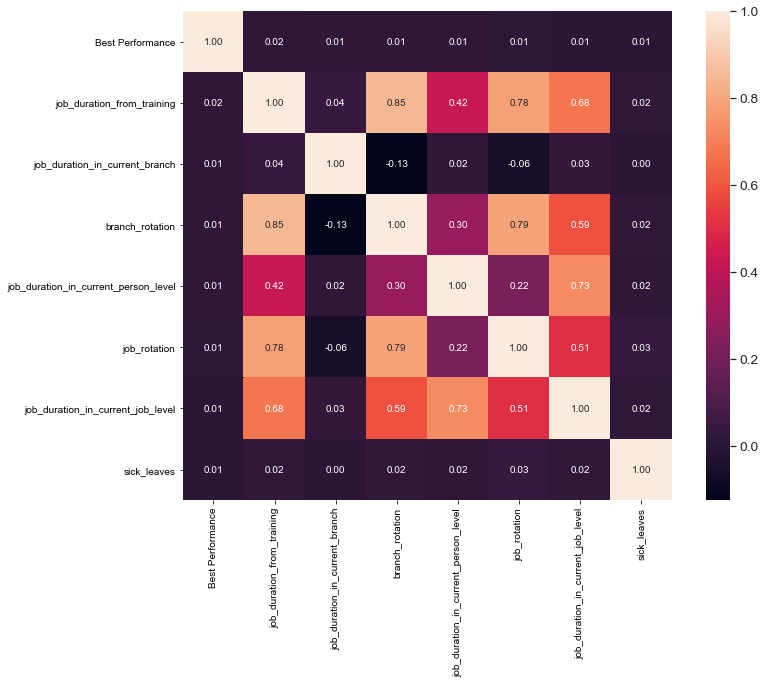

In [32]:
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Best Performance')['Best Performance'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

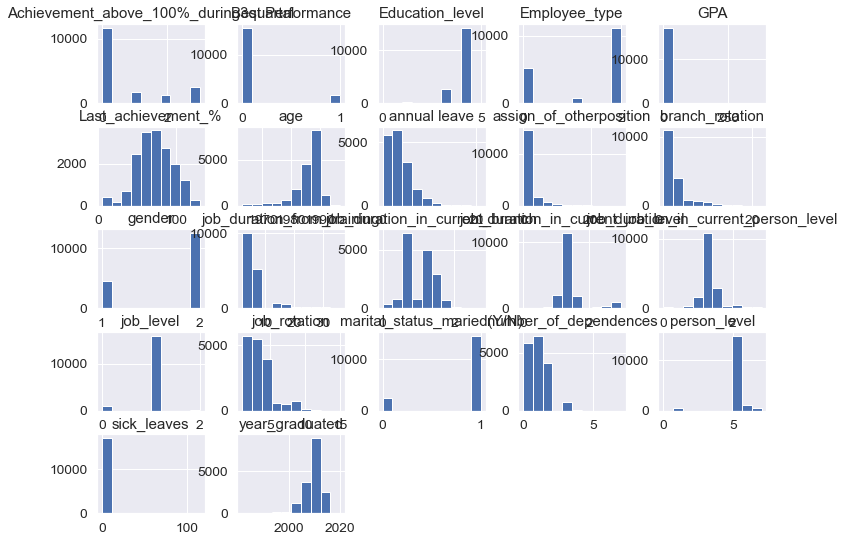

In [33]:
df.hist(figsize=(12,9))
pplt.show()

In [34]:
df_x = pd.DataFrame(df)
df1_x = pd.DataFrame(np.c_[df['job_level'], df['job_duration_in_current_job_level'], df['person_level'], df['job_duration_in_current_person_level'], df['job_duration_in_current_branch'], df['Employee_type'], df['gender'], df['age'], df['marital_status_maried(Y/N)'], df['number_of_dependences'], df['Education_level'], df['GPA'], df['year_graduated'], df['job_duration_from_training'], df['branch_rotation'], df['job_rotation'], df['assign_of_otherposition'], df['annual leave'], df['sick_leaves'], df['Last_achievement_%'], df['Achievement_above_100%_during3quartal']], 
                    columns = ['job_level', 'job_duration_in_current_job_level', 'person_level','job_duration_in_current_person_level','job_duration_in_current_branch', 'Employee_type', 'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences','Education_level', 'GPA', 'year_graduated','job_duration_from_training', 'branch_rotation', 'job_rotation','assign_of_otherposition', 'annual leave', 'sick_leaves','Last_achievement_%', 'Achievement_above_100%_during3quartal'])

df_y = pd.DataFrame(df['Best Performance'])

In [35]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.50, random_state=42)
#Train our model with the training data
reg.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').